<small><font color=gray>Notebook author: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a> ©2021 onwards</font></small><hr style="margin:0;background-color:silver">

**[<font size=6>🧬Genomics</font>](https://www.kaggle.com/c/4mar24jh-genomics/rules)**. [**Instructions**](https://colab.research.google.com/drive/1riOGrE_Fv-yfIbM5V4pgJx4DWcd92cZr#scrollTo=ITaPDPIQEgXV) for running Colabs.

<small>**(Optional) CONSENT.** <mark>[ X ]</mark> We consent to sharing our Colab (after the assignment ends) with other students/instructors for educational purposes. We understand that sharing is optional and this decision will not affect our grade in any way. <font color=gray><i>(If ok with sharing your Colab for educational purposes, leave "X" in the check box.)</i></font></small>

In [ ]:
from google.colab import drive; drive.mount('/content/drive')   # OK to enable, if your kaggle.json is stored in Google Drive

Mounted at /content/drive


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle >> log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                               # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log       # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                  # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v 4mar24jh-genomics # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log              # download competition dataset as a zip file
!unzip -o *.zip >> log                            # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show           # print public leaderboard

cp: cannot stat 'kaggle.json': No such file or directory
- competition is now set to: 4mar24jh-genomics
Using competition: 4mar24jh-genomics
  teamId  teamName     submissionDate       score         
--------  -----------  -------------------  ------------  
11780593  2 Genomics   2024-03-17 02:18:57  0.9871000000  
11764312  4 Genomics   2024-03-17 22:50:49  0.9871000000  
11788322  3 Genomics   2024-03-17 15:44:05  0.9859000000  
11773907  1 🧬Genomics  2024-03-17 02:39:14  0.9848000000  
11784902  7 Genomics   2024-03-17 22:49:02  0.9840000000  
11780792  8  Genomics  2024-03-17 20:17:26  0.9797000000  
11785473  5 Genomics   2024-03-17 03:04:33  0.9797000000  
11785172  Zack         2024-03-17 22:45:14  0.9790000000  
11765258  6 Genomics   2024-03-17 05:52:44  0.9781000000  
11529938  🧬Baseline🐍   2023-09-13 09:22:06  0.9423000000  


In [ ]:
%%time
%%capture
%reset -f
!pip install -U tfds-nightly tensorflow sentence-transformers >> log
# !pip install -U tensorflow_addons >> log  # may throw error: ModuleNotFoundError: No module named 'keras.src.engine'
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os, plotly
import tensorflow as tf, tensorflow.keras as keras # tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer as SBERT
from keras.layers import Flatten, Dense
from sklearn.svm import SVC, LinearSVC
os.environ['TF_DETERMINISTIC_OPS'] = '1'; os.environ['TF_CUDNN_DETERMINISTIC'] = '1'; # allows seeding RNG on GPU
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60*5): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
pd.set_option('display.max_rows', 100, 'display.max_columns', 100, 'display.max_colwidth', 100, 'display.precision', 2, 'display.max_rows', 4)

CPU times: user 10.5 s, sys: 1.79 s, total: 12.3 s
Wall time: 7min 22s


In [ ]:
vX = pd.read_csv('/content/drive/MyDrive/testX_genomics.csv').set_index('id')
tYX = pd.read_csv('/content/drive/MyDrive/trainYX_genomics.csv').set_index('id')
vX

,DNA
id,
100000,TTGATTAATAAGATTCCTTGACACCCTTTGTAAAGTTTCTATTTCGTGTGAAATATCTATCTCTTCAAATCCTTTTAATTTATCTAGGTATTTGCT...
100001,ATTAGTAACGGAGGATTTACTAGATGTTTGGATTTATATTCTAATTTTATTCAGGTGGAAGGGATTGTTTTATGATTCAATAGTATACAGAGAATA...
...,...
119998,CGTCGGCATGCTCGGGCAGTGCGGCGGGCCAGCAGCGTGCCAGTTGTCGCGGGGCGGCCGGGCATCGCGGCGCCGGGCGGCAGCACTCCCGCGAAG...
119999,GCGAGGGCACGAAGGCACGACGGCAACGGCGGCGAGGAGCGCTGTGGCAACCGTCTCCGCGTTTGCGTGCGTACAGCCGAGAGCTGGTTCGCGCAG...


In [ ]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

⏳ started. You have 300 sec. Good luck!


<hr color=green size=40>

<strong><font color=green size=5>⏳Timed Green Playground (TGP): Your ideas, code, documentation, and timer START HERE!</font></strong>

<font color=green>Students: Keep all your definitions, code, documentation in <b>TGP</b>. Modifying any code outside of TGP incurs penalties.

# Dependencies


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## K-Mers Transformation

https://medium.com/swlh/bioinformatics-1-k-mer-counting-8c1283a07e29

K-Mers counting is a method in

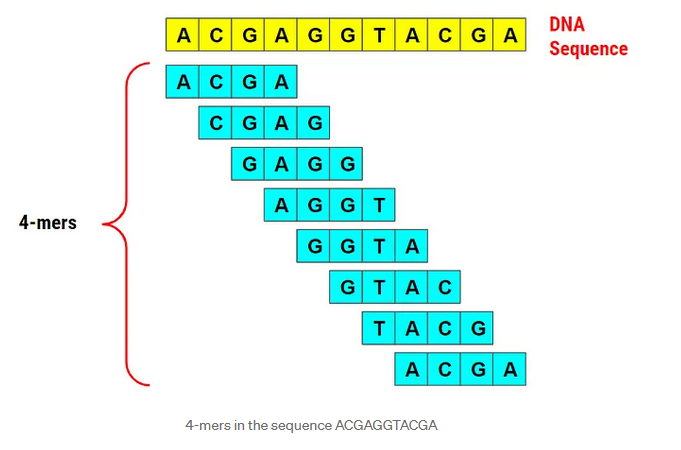

In [ ]:
def Kmers_funct_text(seq, size=5):
   kmers_xform = [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
   kmer_text = ' '.join(kmers_xform)
   return kmer_text

In [ ]:
tYX_copy = tYX.copy()
tYX_copy['words'] = tYX_copy.apply(lambda x: Kmers_funct_text(x['DNA']), axis=1)

vX_copy = vX.copy()
vX_copy['words'] = vX_copy.apply(lambda x: Kmers_funct_text(x['DNA']), axis=1)

# Count Vectorization

DESCRIPTION HERE

In [ ]:
cv = CountVectorizer(ngram_range=(4,4))    # The n-gram size of 4 is

In [ ]:
all_data_xform = cv.fit_transform(list(tYX_copy.words))
vX_xform = cv.transform(list(vX_copy.words))

# Model

DESCRIPTION HERE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_data_xform,
                                                  tYX_copy.Y,
                                                  test_size = 0.20,
                                                  stratify=tYX_copy.Y,
                                                  random_state=42)

m = LinearSVC(random_state=0, max_iter=10000).fit(all_data_xform, tYX_copy.Y)
m.score(all_data_xform, tYX_copy.Y)   # in-sample accuracy

1.0

# Prediction & Output

In [ ]:
y_pred = m.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[10013,     0],
       [    0,  9987]])

In [ ]:
CONFUSION_MATRIX = True
if CONFUSION_MATRIX:

   print("Confusion matrix for predictions on human test DNA sequence\n")
   print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

   def get_metrics(y_test, y_predicted):
      accuracy = accuracy_score(y_test, y_predicted)
      precision = precision_score(y_test, y_predicted, average='weighted')
      recall = recall_score(y_test, y_predicted, average='weighted')
      f1 = f1_score(y_test, y_predicted, average='weighted')
      return accuracy, precision, recall, f1

   accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

   print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted     0     1
Actual               
0          1004  1004
1           975   985
accuracy = 1.000 
precision = 1.000 
recall = 1.000 
f1 = 1.000


<font color=green><h3><b>$\delta$. Make predictions</b><h3>

In [ ]:
output_filename = "Final_Submit_k-5"

In [ ]:
pY = pd.DataFrame(m.predict(vX_xform), index=vX.index, columns=['y'])   # predicted targets
ToCSV((pY>0.5)*1, output_filename)

NameError: name 'pd' is not defined

# References


1. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. United States: O'Reilly Media.

<font color=green><h3><b>$\epsilon$. Documentation</b></h3></font>

<font color=green><h4><b>Task 1. Explain Decisions in Preprocessing Pipeline</b></h4></font>

<font color=green>
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.</font>

<font color=green>

1. Why did you choose these elements? (Something in EDA, prior experience,...? Note: EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>

<font color=red><b>Your answer here.</b></font>

<font color=green><h4><b>Task 2. Explain Decisions in Modeling Pipeline</b></h4></font>

<font color=green>
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>

<font color=red><b>Your answer here.</b></font>

<font color=green><h3><b>$\zeta$. References</b></h3></font>

<font color=red><b>Your answer here.</b></font>

<font color=green>
Cite your sources to help your peers learn from these (and to avoid plagiarism claims). At the least, HOML textbook should be cited. Use Google Scholar to draw APA citation format for books and publications. Also cite StackOverflow, package documentation, and other meaningful internet resources.

1. ...
1. ...

<font size=5>⌛</font> <strong><font color=green size=5>Do not exceed competition's runtime limit! Do not write code outside TGP</font></strong>
<hr color=green size=40>

In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 295 sec


# 💡**Starter Ideas**

1. Learn about DNA [&#127910;](https://www.youtube.com/results?search_query=nucleotides+genes+amino+acids+)
1. Try a larger training sample.
1. Try longer training DNA strings, but SBERT may have a cap on string length, so you might split DNA into several strings and then concatenate or average resulting vectors
1. Try other pretrained SBERT models. Note that DNA sequence uses ACGT letters, but many other models were trained on multilingual text. So, you might prefer those that were trained on mostly ASCII.
1. SBERT is trained on word tokens (typically, separated by spaces), but DNA sequence has no spaces. Try placing spaces after every character or some semantically meaningful subsequences (this might require more domain knowledge).
1. Try Google's [USE](https://tfhub.dev/google/universal-sentence-encoder-multilingual/3) embedding models
1. Try Facebook's [LASER](https://github.com/facebookresearch/LASER) and [others](https://tfhub.dev/s?module-type=text-language-model).
1. Try [Enformer](https://tfhub.dev/deepmind/enformer/1) for gene expressions. See [DeepMind paper](https://deepmind.com/blog/article/enformer).
1. Try building your own embeddings on the given sequences. SBERT and other packages make it easy (just a few lines), but it may take too much time.
1. Assess distribution of character patterns (single, doubles, triplets, ...). For example, an ACGT string generates AC, CG, GT doubles and ACG and CGT triplets. Does one class have more subsequences of some type? This might be a feature in your model.
1. Try features built as counts of subsequences (singles, doubles, triplets, ...). Consider EDA first.
1. Concatenate or otherwise combine multiple embeddings derived from each gene string
1. Learn from [*The genetic code*](https://www.khanacademy.org/science/ap-biology/gene-expression-and-regulation/translation/a/the-genetic-code-discovery-and-properties), Khan Academy.
1. Learn from [*Apply Machine Learning Algorithms for Genomics Data Classification*](https://medium.com/mlearning-ai/apply-machine-learning-algorithms-for-genomics-data-classification-132972933723)
1. Learn from [*Efficient counting of k-mers in DNA sequences using a bloom filter*](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-12-333) Páll Melsted et al. 2011
1. Try [Byte Pair Encoding](https://www.derczynski.com/papers/archive/BPE_Gage.pdf) and [SentencePiece](https://arxiv.org/pdf/1808.06226.pdf) to auto identification of "important" [k-mers](https://en.wikipedia.org/wiki/K-mer) (substrings)